# Data and Libraries

In [1]:
#import libararies
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
import os
path = os.getcwd()
pd.set_option("max_columns",0)

Mounted at /content/drive


In [4]:
df = pd.read_csv('./csv/df_total.csv')
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [ ]:
df.head()

,TARGET,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME,AMT_APP,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,PHONE_CHANGE,TYPE_HOUSE:House,TYPE_HOUSE:Municipal,TYPE_HOUSE:Rented,TYPE_HOUSE:Parents,REGION_RATING:A,REGION_RATING:B,REGION_RATING:C,TYPE_INCOME:Associate,TYPE_INCOME:Pensioner,TYPE_INCOME:Unemployed,TYPE_INCOME:Working,TYPE_EDUCATIOM:Higher,TYPE_EDUCATIOM:Incomplete,TYPE_EDUCATIOM:Secondary,FAMILY_STATUS:Married,FAMILY_STATUS:Widow,FAMILY_STATUS:Single,BU_NUM_LOAN,BU_SUM_LOAN,BU_SUM_OPEN_DEBT,BU_PER_ACCTIVE,BU_PER_CLOSED,HC_NUM_APP,HC_MEAN_AMT_APP,HC_MEAN_PER_AMT_APPROVAL,HC_PER_ACCTIVE,HC_PER_CLOSED,HC_PER_DEBT,HC_MEAN_PER_DOWN,HC_MEAN_ANNUITY,HC_MEAN_NUM_INST,HC_MEAN_AMT_INST,HC_MEAN_DELAY_INST,HC_MEAN_AMT_DIFF_INST,HC_PER_UNPAID_INST,AGE
0,1,0,1,0,0,202500,406597,24700,-9461,-637,-1134,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,8,865055,245781,0.25,0.75,1,179055,1.00,1.00,0.00,0.0,0.00,9251,19,11559,-20,0,0.0,25
1,0,1,1,1,0,270000,1293502,35698,-16765,-1188,-828,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,4,1017400,0,0.25,0.75,3,435436,1.06,0.33,0.67,0.0,0.05,56553,8,64755,-7,0,0.0,45
2,0,0,0,0,0,67500,135000,6750,-19046,-225,-815,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,2,189037,0,0.00,1.00,1,24282,0.83,0.00,1.00,0.0,0.21,5357,3,7096,-8,0,0.0,52
3,0,0,1,0,0,121500,513000,21865,-19932,-3038,-1106,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,146250,0,0.00,1.00,5,135636,1.00,0.40,0.60,0.0,0.16,12132,13,12214,-4,-452,0.0,54
4,0,0,1,0,0,99000,490495,27517,-16941,-1588,-2536,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,3,468445,240057,0.33,0.67,4,194627,0.98,0.00,1.00,0.0,0.07,15839,8,27361,26,-342,0.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245837,0,1,1,0,0,112500,345510,17770,-11870,-399,-2315,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,11,5185462,2193390,0.27,0.73,4,61663,0.98,0.25,0.75,0.0,0.05,10466,5,12928,-7,0,0.0,32
245838,0,1,1,0,0,112500,225000,22050,-24384,365243,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,13,3693858,163071,0.15,0.85,1,180000,1.07,0.00,1.00,0.0,0.00,22770,12,22771,-2,0,0.0,66
245839,0,1,1,0,0,153000,677664,29979,-14966,-7921,-1909,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,4,3960000,1795833,0.50,0.50,2,24162,0.83,0.50,0.50,0.0,0.21,4770,5,4482,-18,-361,0.0,41
245840,1,1,1,0,0,171000,370107,20205,-11961,-4786,-322,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,45000,0,0.00,1.00,2,121317,1.12,1.00,0.00,0.0,0.00,10681,9,10240,-19,0,0.0,32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245842 entries, 0 to 245841
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   TARGET                     245842 non-null  int64  
 1   GENDER                     245842 non-null  int64  
 2   OWN_CAR                    245842 non-null  int64  
 3   OWN_REALTY                 245842 non-null  int64  
 4   CNT_CHILDREN               245842 non-null  int64  
 5   AMT_INCOME                 245842 non-null  int64  
 6   AMT_APP                    245842 non-null  int64  
 7   AMT_ANNUITY                245842 non-null  int64  
 8   DAYS_BIRTH                 245842 non-null  int64  
 9   DAYS_EMPLOYED              245842 non-null  int64  
 10  PHONE_CHANGE               245842 non-null  int64  
 11  TYPE_HOUSE:House           245842 non-null  int64  
 12  TYPE_HOUSE:Municipal       245842 non-null  int64  
 13  TYPE_HOUSE:Rented          24

# EDA

## Outliers

We tested outliers on all the features in the dataframe.
An example of the test procedure for a specific column - DAYS_EMPLYED is shown below:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


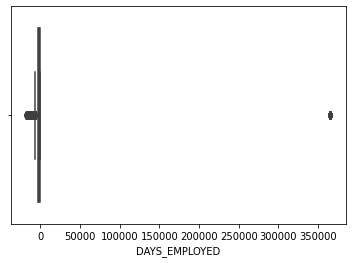

In [ ]:
sns.boxplot(df['DAYS_EMPLOYED'])


<font color='blue'>The column shows the total days in the last workplace in relation to the date of the current loan application.There can be no values higher than 0

In [6]:
df['AGE']=-(df['DAYS_BIRTH']/365).astype('int')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


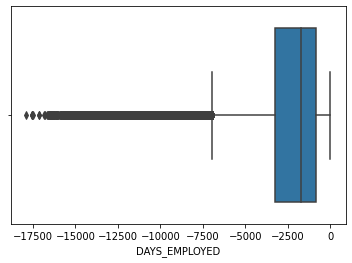

In [ ]:
mask_days_emp=df[df['DAYS_EMPLOYED'] <= 0]
sns.boxplot(mask_days_emp['DAYS_EMPLOYED'])

<font color='blue'>Minimum values are obtained in a column of about 17,000 days - about 50 years. We will check in comparison with the age column that the figure is indeed possible:

Text(0.5, 1.0, 'DAYS_EMPLOYED VS AGE')

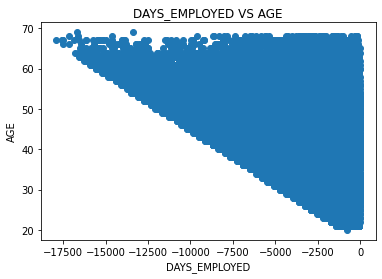

In [ ]:
plt.scatter(data=mask_days_emp, x='DAYS_EMPLOYED' ,y='AGE')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('AGE')
plt.title('DAYS_EMPLOYED VS AGE')

<font color='blue'>High number of working days - about 50 years, obtained ages 60-70 years.
it makes sense that those costuners started working at the age of 20.

In [10]:
#fuction for dropping outliers from all columns

def outliers_drop(df):

    df_eda1=pd.DataFrame(df)
    outliers_index = df.loc[(df['AMT_INCOME'] > 2000000) | (df['AMT_APP'] > 2800000) |\
                        (df['AMT_ANNUITY'] >185000) | (df['BU_SUM_LOAN']> 200000000) |\
                        (df['BU_SUM_OPEN_DEBT']> 20000000) | (df['HC_NUM_APP']> 15) |\
                        (df['BU_NUM_LOAN']> 80) | (df['HC_MEAN_AMT_APP'] > 2500000) |\
                        (df['HC_MEAN_PER_AMT_APPROVAL'] > 1.6) | (df['HC_PER_DEBT'] > 0) |\
                        (df['HC_MEAN_ANNUITY'] > 200000) | (df['HC_MEAN_NUM_INST'] > 80) |\
                        (df['HC_MEAN_AMT_INST'] > 1000000) | (df['HC_MEAN_PER_DOWN'] > 0.90) |\
                        (df['HC_MEAN_DELAY_INST'] > 300)].index

    df_eda1= df_eda1.drop(outliers_index , axis=0)
    df_eda1= df_eda1.drop('AGE' , axis=1)
    df_eda1['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)
    return df_eda1

In [11]:
df_eda1=outliers_drop(df)

In [12]:
df_eda1.shape

(245509, 46)

<font color='blue'>finally- after outliers EDA we droped 333 index.

## Dummies EDA 

<font color='blue'>Dummis was made for the categorial features. let's have a look on their behavior:



In [25]:
#TYPE EDUCATION features
col_type_education = ['TYPE_EDUCATIOM:Higher', 'TYPE_EDUCATIOM:Incomplete', 'TYPE_EDUCATIOM:Secondary']

#TYPE HOUSE features
col_type_house = ['TYPE_HOUSE:House', 'TYPE_HOUSE:Municipal', 'TYPE_HOUSE:Rented', 'TYPE_HOUSE:Parents']

#FAMILY STATUS features
col_type_family = ['FAMILY_STATUS:Married', 'FAMILY_STATUS:Widow', 'FAMILY_STATUS:Single']

#TYPE INCOME features
col_type_income = ['TYPE_INCOME:Associate', 'TYPE_INCOME:Pensioner', 'TYPE_INCOME:Unemployed','TYPE_INCOME:Working']

#TYPE previous loans status features
col_prev_loan_status = ['BU_PER_ACCTIVE','BU_PER_CLOSED','HC_PER_ACCTIVE','HC_PER_CLOSED']

In [26]:
df_edu = df_eda1.filter(col_type_education, axis=1)
df_house = df_eda1.filter(col_type_house, axis=1)
df_family = df_eda1.filter(col_type_family, axis=1)
df_income = df_eda1.filter(col_type_income, axis=1)
df_prev_status = df_eda1.filter(col_prev_loan_status, axis=1)

### Education Type Features

In [27]:
df_edu.sum(axis=0)/df_edu.shape[0]

TYPE_EDUCATIOM:Higher        0.241018
TYPE_EDUCATIOM:Incomplete    0.032528
TYPE_EDUCATIOM:Secondary     0.726454
dtype: float64

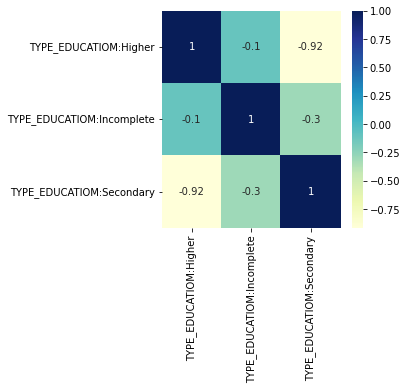

In [28]:
# plotting correlation heatmap
fig=plt.figure(figsize=(4,4))
dataplot = sns.heatmap(df_edu.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<font color='blue'> * Secondary status is 72% of the data, and with corr of 0.92 to higher status. By that, we have chosen to represent the 3 statuses in one column TYPE_EDUCATIN:Higher

<font color='blue'> - 0 values represented the status incomplete + secondary.

<font color='blue'> - 1 values represented higher education.

<font color='blue'> * The unification of the groups is due to the fact that the incomplete status constitutes only 3% of the group of secondary education status.
<font color='blue'>


### House Type Features

In [29]:
df_house.sum(axis=0)/df_house.shape[0]

TYPE_HOUSE:House        0.893702
TYPE_HOUSE:Municipal    0.036394
TYPE_HOUSE:Rented       0.023596
TYPE_HOUSE:Parents      0.046308
dtype: float64

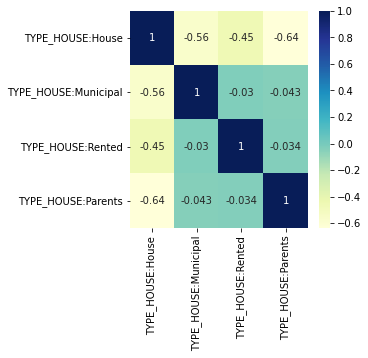

In [30]:
# plotting correlation heatmap
fig=plt.figure(figsize=(4,4))
dataplot = sns.heatmap(df_house.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<font color='blue'> TYPE_HOUSE:House column is about 90% of the data.
<font color='blue'>  * we have chosen to represent the 4 statuses in one column TYPE_HOUSE:House. 

<font color='blue'> - 1 values represented TYPE_HOUSE:House .

<font color='blue'> - 0 values represented the others status all together.

<font color='blue'> * The unification of the groups is due to the fact that the Parents, Rented and Municipal status constitutes only 10% of the data and their status refers to less economical stable status.
</font>

### Family Status Features

In [31]:
df_family.sum(axis=0)/df_family.shape[0]

FAMILY_STATUS:Married    0.743529
FAMILY_STATUS:Widow      0.052845
FAMILY_STATUS:Single     0.203626
dtype: float64

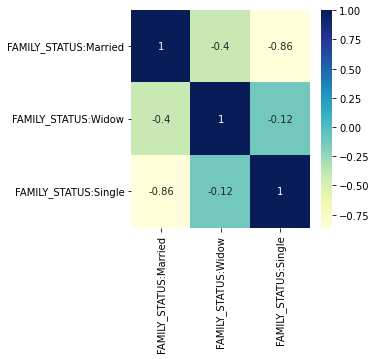

In [32]:
# plotting correlation heatmap
fig=plt.figure(figsize=(4,4))
dataplot = sns.heatmap(df_family.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<font color='blue'> FAMILY STATUS:Married column is about 74% of the data.
<font color='blue'> * we have chosen to represent the 3 statuses in one column TYPE_HOUSE:House. 

<font color='blue'>- 1 values represented FAMILY STATUS:Married .

<font color='blue'>- 0 values represented the others status. 

<font color='blue'>* The unification of the statuses is due to the fact that widow is only 5% of the data and is close to the group of single by that both groups coul'd be with less economic stability.

### Income Type Features

In [33]:
df_income.sum(axis=0)/df_income.shape[0]

TYPE_INCOME:Associate     0.223417
TYPE_INCOME:Pensioner     0.179574
TYPE_INCOME:Unemployed    0.000049
TYPE_INCOME:Working       0.596960
dtype: float64

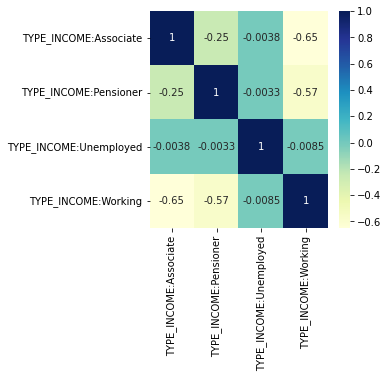

In [34]:
# plotting correlation heatmap
fig=plt.figure(figsize=(4,4))
dataplot = sns.heatmap(df_income.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<font color='blue'> TYPE_INCOME column: there are 4 dummis in the dataframe.Unemployed column with less then 1% of the data, this column

Previous loans status

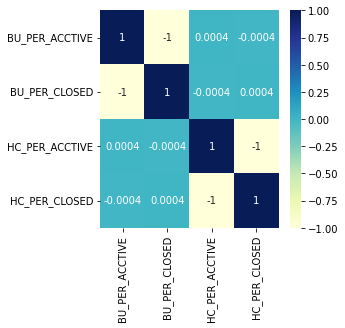

In [35]:
# plotting correlation heatmap
fig=plt.figure(figsize=(4,4))
dataplot = sns.heatmap(df_prev_status.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<font color='blue'> active and closed previous loans status are complement (corr=1) each other and their by we will drop 'closed' status column for HC and BU data.

<font color='blue'> -1 values represant active loan status.

<font color='blue'> -0 values represent close loan atatus.

In [36]:
#dropping columns as decided in this section (Dummies EDA)
df_eda2=df_eda1.drop(['TYPE_HOUSE:Municipal', 'TYPE_HOUSE:Rented',
                          'TYPE_HOUSE:Parents','TYPE_INCOME:Unemployed',
                          'TYPE_EDUCATIOM:Incomplete','TYPE_EDUCATIOM:Secondary',
                          'FAMILY_STATUS:Widow', 'FAMILY_STATUS:Single',
                          'BU_PER_CLOSED','HC_PER_CLOSED'], axis=1)

## Correlation Between Features

In [37]:
col_corr= ['AMT_ANNUITY','AMT_APP','HC_MEAN_AMT_APP','HC_MEAN_ANNUITY','HC_MEAN_PER_DOWN','HC_MEAN_PER_AMT_APPROVAL']
df_corr=df_eda2.filter(col_corr,axis=1)

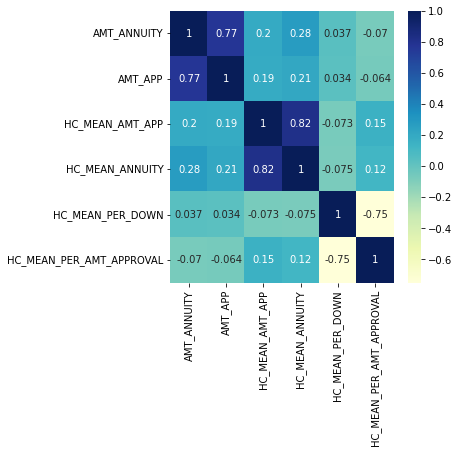

In [38]:
# plotting correlation heatmap
fig=plt.figure(figsize=(5,5))
dataplot = sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<font color='blue'>**Let's explore the columns with correlation**:

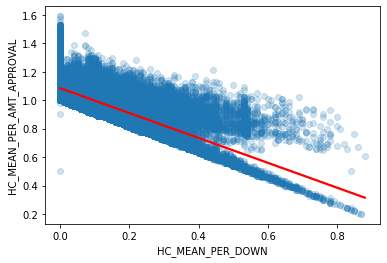

In [39]:
sns.regplot(data = df_eda2,
            x='HC_MEAN_PER_DOWN',
            y='HC_MEAN_PER_AMT_APPROVAL',
            line_kws={'color': 'red'},
            scatter_kws = {'alpha' : 0.2})

<font color='blue'>Loan approval ratio is higher while debt reduction is lower, whic also consistant with the logic. Since there is a correlation between these two columns, we will drop one of them : HC_MEAN_PER_DOWN.
 

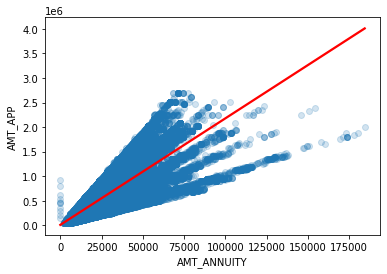

In [40]:
sns.regplot(data = df_eda2,
            x='AMT_ANNUITY',
            y='AMT_APP',
            line_kws={'color': 'red'},
            scatter_kws = {'alpha' : 0.2})

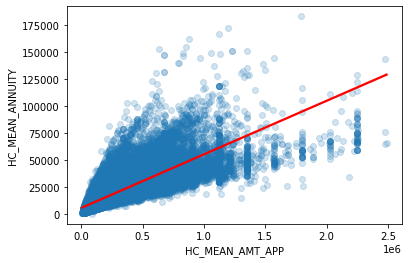

In [41]:
sns.regplot(data = df_eda2,
            x='HC_MEAN_AMT_APP',
            y='HC_MEAN_ANNUITY',
            line_kws={'color': 'red'},
            scatter_kws = {'alpha' : 0.2})

<font color='blue'> Loan application amountis higher while Annuity amount is higher. Since there is a correlation between these two columns, we will drop one of them : AMT_ANNUITY
 

In [42]:
df_eda3=df_eda2.drop(['HC_MEAN_PER_DOWN','HC_MEAN_ANNUITY','AMT_ANNUITY'],axis=1)

##Imbalanced Data

In [43]:
#The part that constitutes whether he received a loan (0) or if he was rejected (1) from in TARGET column
df['TARGET'].value_counts()/df.shape[0]

0    0.922047
1    0.077953
Name: TARGET, dtype: float64

<font color='blue'>rejected loans are 7.8% from the data. We'll address this at the model part.

## Features (int type) VS TARGET

In [44]:
col_amt = [ 'DAYS_BIRTH',  'HC_NUM_APP', 'BU_NUM_LOAN','HC_NUM_APP','HC_MEAN_NUM_INST', 
           'HC_MEAN_AMT_DIFF_INST', 'DAYS_EMPLOYED','CNT_CHILDREN' ]

In [45]:
df_amt=df_eda2.filter(col_amt,axis=1)

In [46]:
scaler = StandardScaler()

In [47]:
df_amt[col_amt] = scaler.fit_transform(df_amt[col_amt])

In [48]:
df_amt['TARGET']=df_eda2['TARGET']

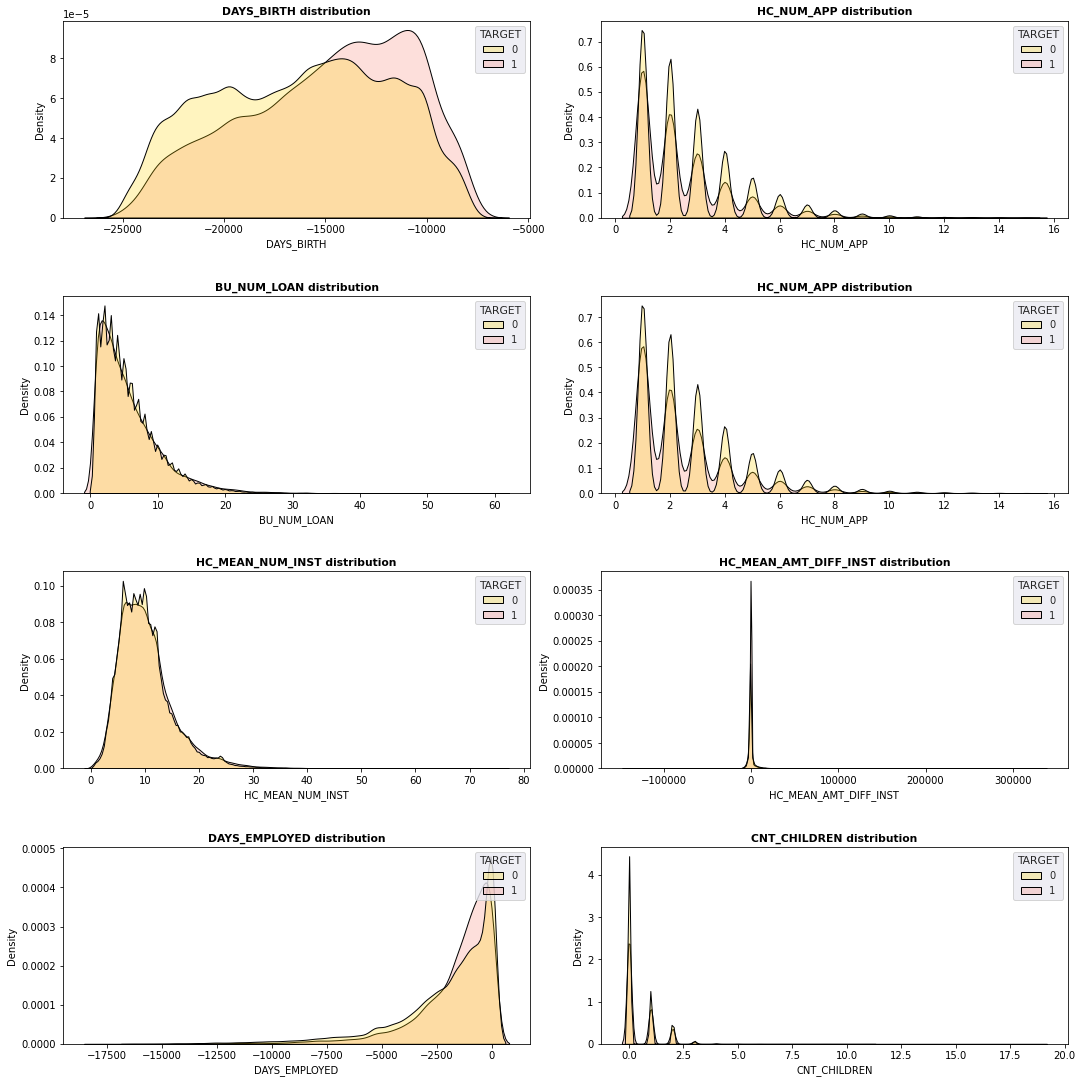

In [49]:
color_main = 'gold'
my_colors = [color_main, 'salmon', 'wheat', 'red']

# Dist plot of all numberical features
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15,15))
index, ax = 0, ax.flatten()
title = "numerical features distribution"
sample = df_eda3.reset_index()
sns.set(font_scale=0.9)

for col in col_amt:
    sns.kdeplot(data=df_eda3, x=col,common_norm=False,hue='TARGET',
                    palette=my_colors[:2],shade=True, edgecolor="black",
                   ax=ax[index]).set_title(f"{col} distribution", weight="bold")
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=3.0)
                  

<font color='blue'>**It is almost impossible to distinguish between the features associated with target 0 and those associated with target 1.**

In [50]:
mask_0= df_eda3[df_eda3['TARGET']==0]
mask_1=df_eda3[df_eda3['TARGET']==1]

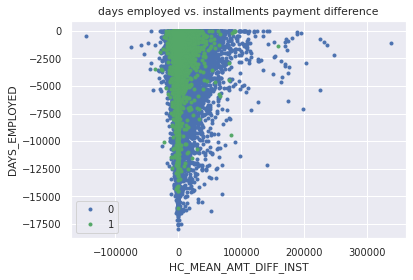

In [51]:
plt.figure()
plt.plot(mask_0.HC_MEAN_AMT_DIFF_INST, mask_0.DAYS_EMPLOYED, '.b')
plt.plot(mask_1.HC_MEAN_AMT_DIFF_INST, mask_1.DAYS_EMPLOYED, 
         linewidth=3, color='g', ls='', marker='.')

plt.xlabel('HC_MEAN_AMT_DIFF_INST')
plt.ylabel('DAYS_EMPLOYED')
plt.title('days employed vs. installments payment difference')
plt.legend(['0', '1'], loc='best')


<font color='blue'>An example of the behavior of two features with a distinction between the target. It can be seen that the target group 1 is contained in the target group 0. This behavior is very similar to all the features, which will make it very difficult for the models for prediction.

In [52]:
df_eda3.to_csv('./csv/df_final_eda.csv')

In [53]:
df_eda3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245509 entries, 0 to 245841
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    245509 non-null  int64  
 1   GENDER                    245509 non-null  int64  
 2   OWN_CAR                   245509 non-null  int64  
 3   OWN_REALTY                245509 non-null  int64  
 4   CNT_CHILDREN              245509 non-null  int64  
 5   AMT_INCOME                245509 non-null  int64  
 6   AMT_APP                   245509 non-null  int64  
 7   DAYS_BIRTH                245509 non-null  int64  
 8   DAYS_EMPLOYED             245509 non-null  int64  
 9   PHONE_CHANGE              245509 non-null  int64  
 10  TYPE_HOUSE:House          245509 non-null  int64  
 11  REGION_RATING:A           245509 non-null  int64  
 12  REGION_RATING:B           245509 non-null  int64  
 13  REGION_RATING:C           245509 non-null  i